https://colab.research.google.com/drive/1vFh06xhkr10rgr17kip3fmpfhMqrWwmK?usp=sharing

In [ ]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv

--2021-04-24 03:48:05--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23278 (23K) [text/plain]
Saving to: ‘pima-indians-diabetes.data.csv’

pima-indians-diabet 100%[===================>]  22.73K  --.-KB/s    in 0.001s  

2021-04-24 03:48:05 (17.1 MB/s) - ‘pima-indians-diabetes.data.csv’ saved [23278/23278]



In [ ]:
...
# load the dataset
dataset = loadtxt('pima-indians-diabetes.data.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]

In [ ]:
model = Sequential()
model.add(Dense(8, input_dim=8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 9         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________
None


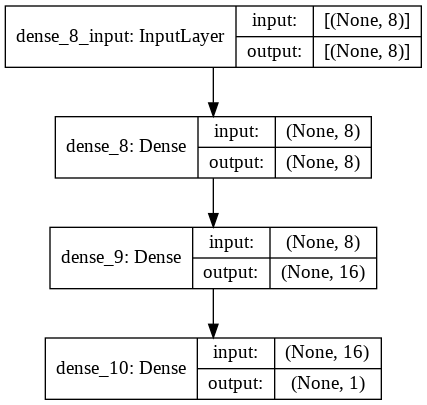

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10)

Epoch 1/150
77/77 [==============================] - 1s 967us/step - loss: 4.7622 - accuracy: 0.5028
Epoch 2/150
77/77 [==============================] - 0s 936us/step - loss: 1.7164 - accuracy: 0.5828
Epoch 3/150
77/77 [==============================] - 0s 979us/step - loss: 1.3221 - accuracy: 0.6106
Epoch 4/150
77/77 [==============================] - 0s 958us/step - loss: 1.0834 - accuracy: 0.6148
Epoch 5/150
77/77 [==============================] - 0s 937us/step - loss: 0.9317 - accuracy: 0.6096
Epoch 6/150
77/77 [==============================] - 0s 979us/step - loss: 0.9281 - accuracy: 0.6011
Epoch 7/150
77/77 [==============================] - 0s 1ms/step - loss: 0.8384 - accuracy: 0.6167
Epoch 8/150
77/77 [==============================] - 0s 1ms/step - loss: 0.8359 - accuracy: 0.6189
Epoch 9/150
77/77 [==============================] - 0s 1ms/step - loss: 0.9241 - accuracy: 0.6214
Epoch 10/150
77/77 [==============================] - 0s 948us/step - loss: 0.7508 - accuracy: 0.

In [ ]:
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

24/24 [==============================] - 0s 927us/step - loss: 0.4957 - accuracy: 0.7695
Accuracy: 76.95


In [ ]:
#np.argmax(model.predict(x), axis=-1)
#(model.predict(x) > 0.5).astype("int32")
predictions = (model.predict(X) > 0.5).astype("int32")
# summarize the first 5 cases
for i in range(5):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 1 (expected 1)


In [ ]:
model.save('my_model')

INFO:tensorflow:Assets written to: my_model/assets


In [ ]:
from tensorflow import keras
reconstructed_model = keras.models.load_model("my_model")

In [ ]:
predictions = (reconstructed_model.predict(X) > 0.5).astype("int32")
for i in range(5):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 1 (expected 1)
